In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1 - Regression

An important goal in this exercise is to show how sampling and noise in data can have a large effect on the hypotheses we find to model the data. This is especially important when dealing with small data sets.

Load the dataset from the *polydata.npy* file. You can easily load this data using the *load()* function from the Numpy library.

Split it into three sets: half the points for training, 30% for validation and 20% for test. The training set will be used to fit each polynomial curve. The validation set will be used to estimate the validation error of each polynomial curve and thus select the best one. The test set will be used to obtain an unbiased estimate of the true error of selected curve since selecting curves based on the error measure will make that measure biased. As we are working under the data sampling independence assumption, remember to shue the data randomly before splitting it because the order of the data in the file may not be random. Remember to standardize the data.

Now select the best polynomial curve from polynomials of degree 1 through 15. Your script should report the best degree for the polynomial curve and also the test error of the best hypothesis. Also, do the plot of the dierent polynomials.

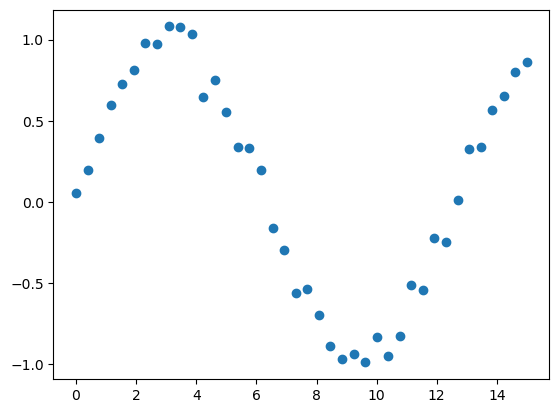

In [8]:
dataset = np.load('polydata.npy')
plt.plot(dataset[:,0], dataset[:,1], 'o')

In [9]:
X = dataset[:,0]
Y = dataset[:, 1]

In [10]:
from sklearn.model_selection import train_test_split

# Split data into train, validation and test

X_train, X_rest, Y_train, Y_rest = train_test_split(X, Y, test_size=0.5)
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.4)

# Standardize data

X_test = (X_test - X_train.mean()) / X_train.std()
X_val = (X_val - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

Y_test = (Y_test - Y_train.mean()) / Y_train.std()
Y_val = (Y_val - Y_train.mean()) / Y_train.std()
Y_train = (Y_train - Y_train.mean()) / Y_train.std()

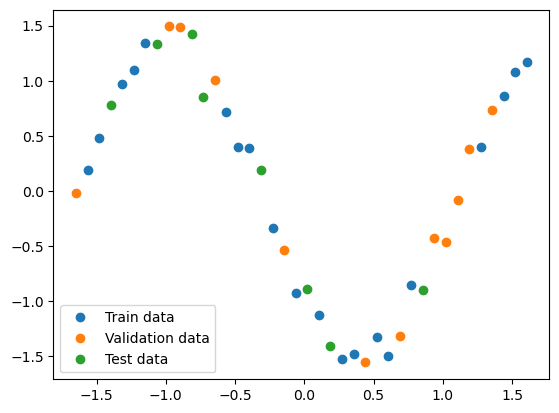

In [11]:
plt.plot(X_train, Y_train, 'o', label='Train data')
plt.plot(X_val, Y_val, 'o', label='Validation data')
plt.plot(X_test, Y_test, 'o', label='Test data')
plt.legend()

Text(0.5, 1.0, 'Best degree: 6 - Test error: 4.36e-02')

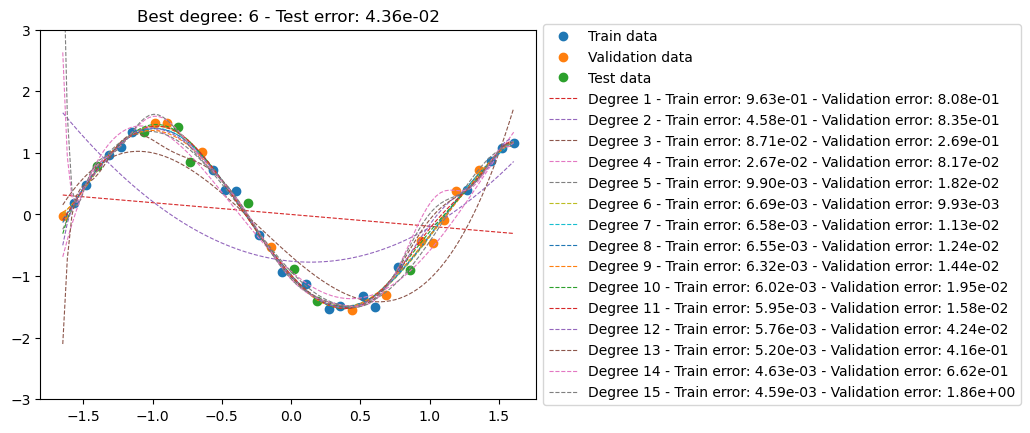

In [12]:
plt.plot(X_train, Y_train, 'o', label='Train data')
plt.plot(X_val, Y_val, 'o', label='Validation data')
plt.plot(X_test, Y_test, 'o', label='Test data')

degrees = range(1, 16)

best_degree = -1
best_val_error = 1e6
best_coefs = []

train_errors = []
val_errors = []
for degree in degrees:
    
    # Fit polynomial
    poly_coefs = np.polyfit(X_train, Y_train, degree)
    
    # Predict train data and validation data
    y_train_pred = np.polyval(poly_coefs, X_train)
    y_val_pred = np.polyval(poly_coefs, X_val)
    
    # Compute train and validation error
    train_error = np.mean((y_train_pred - Y_train)**2)
    val_error = np.mean((y_val_pred - Y_val)**2)
    
    train_errors.append(train_error)
    val_errors.append(val_error)
    
    # Save the degree with the lowest validation error
    if val_error < best_val_error:
        best_val_error = val_error
        best_degree = degree
        best_coefs = poly_coefs
    
    # Plot train data and polynomial function
    t = np.linspace(min(np.concatenate((X_train, X_val, X_test))), 
                    max(np.concatenate((X_train, X_val, X_test))), 
                    100)
    poly_function = np.polyval(poly_coefs, t)
    
    plt.plot(t, poly_function, '--', linewidth=0.8, label=f'Degree {degree} - Train error: {train_error:.2e} - Validation error: {val_error:.2e}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Compute test error
y_test_pred = np.polyval(poly_coefs, X_test)
test_error = np.mean((y_test_pred - Y_test)**2)

plt.ylim(-3, 3)
plt.title(f"Best degree: {best_degree} - Test error: {test_error:.2e}")

Text(0, 0.5, 'Mean squared error')

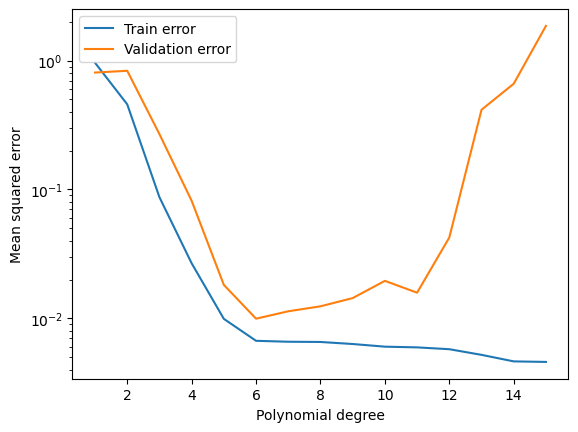

In [13]:
plt.plot(degrees, train_errors, label='Train error')
plt.plot(degrees, val_errors, label='Validation error')
plt.yscale('log')
plt.legend()
plt.xlabel('Polynomial degree')
plt.ylabel('Mean squared error')

# Classification

## Exercise 2 - Logistic Regression

### Exercise 2.1 - Model selection with cross-validation

Load the dataset from the *ex2_data.txt* file. You can easily load this data using the *loadtxt()* function from the Numpy library. You can use the *t3_aux.py* file with auxiliary functions for this exercise ( *poly_16features(X)* and
*create_plot* ).

Load the data, split it into the training and test sets, and standardize it. Note that, in regression, as we did in the previous exercise, we also standardize the values to predict so that the results are more reproducible and to avoid numerical instability. In classification, however, the values to predict are class labels and it makes no sense to standardize those. So apply standardization only to the feature vectors. 

Then expand the data to 16 features. Use one third of the data for the test set. The training set will be used to select the number of features to use by cross-validation. Remember to shuffle the data randomly before splitting it because the order of the data in the file may not be random. Use stratified sampling for splitting the data and for
the cross-validation folds.

Now select the best logistic regression model by 10-fold cross-validation. Plot the training and cross-validation error for the different models to select the best one. If several models have very similar cross-validation errors, prefer a model with fewer features. 

Try running your code a few times to get a feeling for how the results vary depending on the assignment of points to training and testing sets. Note that this is often the case with small data sets, although the eect is less pronounced the more data there is available. Once you select the correct number of features, train a logistic regression with that number of features using the full training set and measure the test error.

In [14]:
import ex2_aux as aux

In [15]:
dataset = np.loadtxt('ex2_data.txt', delimiter=',')

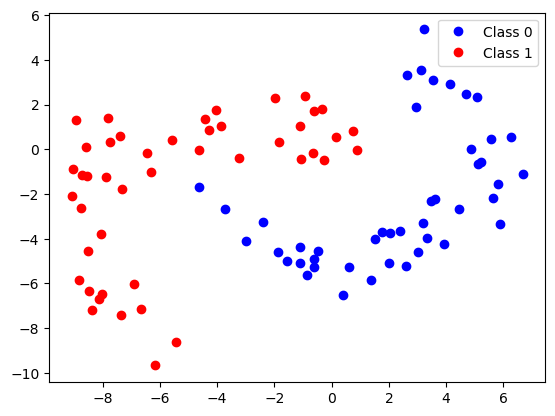

In [16]:
X = dataset[:, 1:]
Y = dataset[:, 0]

plt.plot(X[Y == 0, 0], X[Y == 0, 1], 'bo', label='Class 0')
plt.plot(X[Y == 1, 0], X[Y == 1, 1], 'ro', label='Class 1')
plt.legend()

In [17]:
# Divide and standardize data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

# Expand features
X_train = aux.poly_16features(X_train)
X_test = aux.poly_16features(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

train_errors = []
val_errors = []

best_feats = -1
best_val_error = 1e6


# Cross validation with 10 folds
folds = 10
kf = StratifiedKFold(n_splits=folds)

# Explore different number of features
n_features = range(2, X_train.shape[1] + 1)
for feats in n_features:
    train_error = 0.0
    val_error = 0.
    for train_idx, valid_idx in kf.split(Y_train,Y_train):
        # Compute train and validation errors for the current fold
        tr_err, val_err = aux.calc_fold(feats, X_train, Y_train, 
                                           train_idx, valid_idx)
        
        train_error += tr_err
        val_error += val_err
    
    
    train_errors.append(train_error / folds)
    val_errors.append(val_error / folds)
    
    # Save the model with the lowest validation error
    if val_error / folds < best_val_error:
        best_val_error = val_error / folds
        best_feats = feats

Text(0, 0.5, 'Mean squared error')

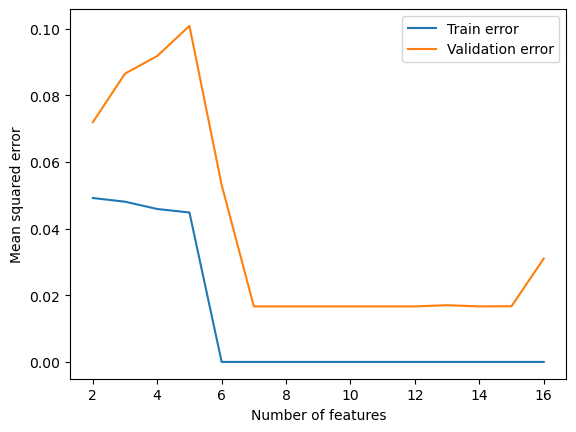

In [19]:
plt.plot(n_features, train_errors, label='Train error')
plt.plot(n_features, val_errors, label='Validation error')
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('Mean squared error')

Text(0.5, 1.0, '9 features - Test error: 1.00e-01')

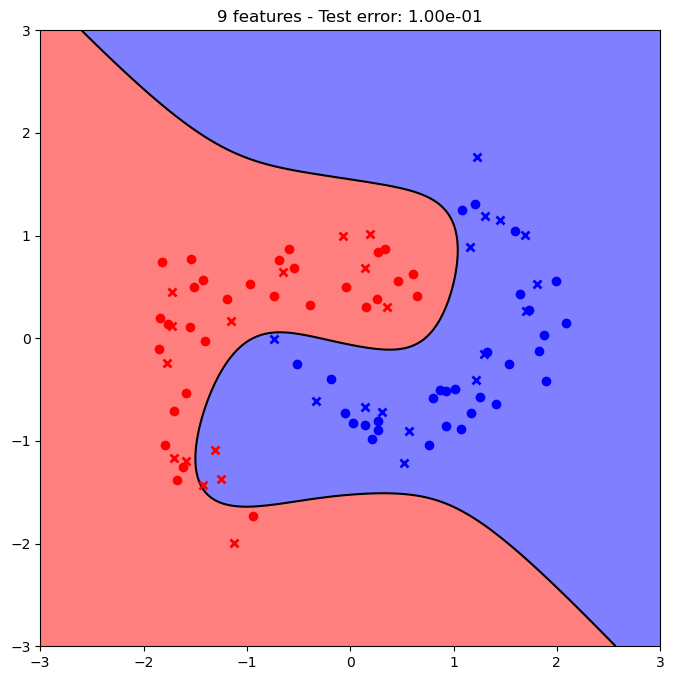

In [20]:
# Plot best model and compute the test error
aux.create_plot(X_train, Y_train, X_test, Y_test, best_feats, best_c=1e12)

# Fit model with the entire training set
reg = LogisticRegression(C=1e12, tol=1e-10)
reg.fit(X_train,Y_train)

# Compute test error
test_error = 1 - reg.score(X_test, Y_test)
plt.title(f'{best_feats} features - Test error: {test_error:.2e}')

### Exercise 2.2 - Regularization

Use cross validation to find the best C value for regularization of the 16-features model. Start with
C = 1.0 and double the value of C at each iteration for 20 iterations, reporting the C value and the cross validation error for each iteration. Once you select the best value for C, train a logistic regression with that value using the full training set and measure the test error.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

train_errors = []
val_errors = []
Cs = []

best_c = -1
best_val_error = 1e6

# Cross validation with 10 folds
folds = 10
kf = StratifiedKFold(n_splits=folds)

# Explore different values for the regularization parameter C
C = 1.0
for _ in range(20):
    Cs.append(C)
    train_error = 0
    val_error = 0
    for train_idx, valid_idx in kf.split(Y_train,Y_train):
        # Compute train and validation errors for the current fold
        tr_err, val_err = aux.calc_fold(X_train.shape[1], X_train, Y_train, 
                                           train_idx, valid_idx, C=C)
        
        train_error += tr_err
        val_error += val_err
    
    
    train_errors.append(train_error / folds)
    val_errors.append(val_error / folds)
    
    # Save the model with the lowest validation error
    if val_error / folds < best_val_error:
        best_val_error = val_error / folds
        best_c = C
    
    C *= 2

Text(0, 0.5, 'Mean squared error')

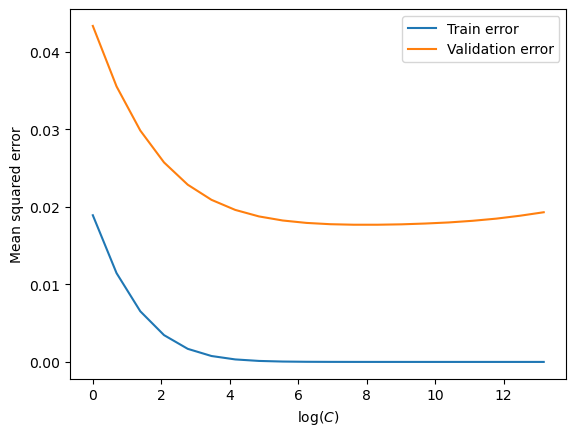

In [22]:
plt.plot(np.log(Cs), train_errors, label='Train error')
plt.plot(np.log(Cs), val_errors, label='Validation error')
plt.legend()
plt.xlabel('$\log(C)$')
plt.ylabel('Mean squared error')

Text(0.5, 1.0, '16 features - Best C: 2048.0 - Test error: 1.00e-01')

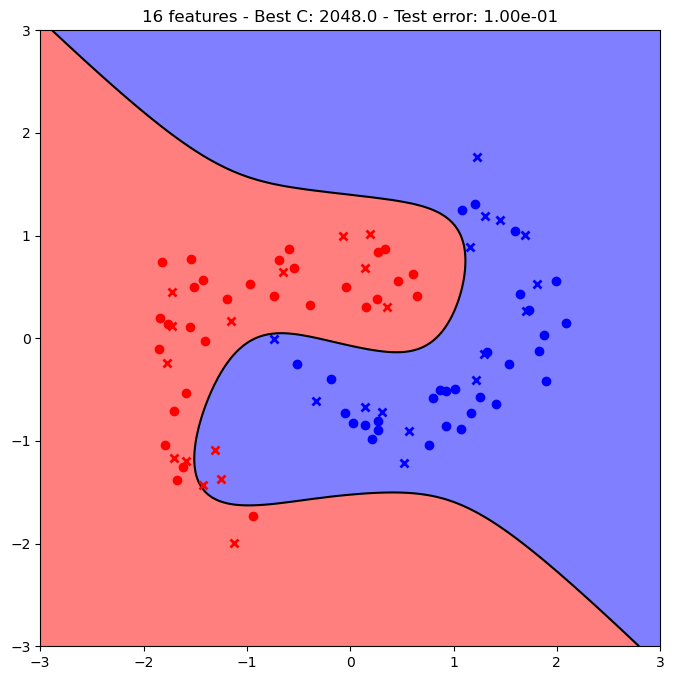

In [23]:
# Plot best model and compute the test error
aux.create_plot(X_train, Y_train, X_test, Y_test, X_train.shape[1], best_c=best_c)

# Fit model with best parameters with the entire training set
reg = LogisticRegression(C=best_c, tol=1e-10)
reg.fit(X_train,Y_train)

# Compute test error
test_error = 1 - reg.score(X_test, Y_test)
plt.title(f'{X_train.shape[1]} features - Best C: {best_c} - Test error: {test_error:.2e}')

## Exercise 3 - Support Vector Machines

In this exercise you will train a Support Vector Machine to classify the data set. Load the dataset from the *ex3_data.txt* file. You can easily load this data using the *loadtxt()* function from the Numpy library. You can use the *ex3_aux.py* file with auxiliary functions for this exercise, to plot the results.

Load the data, standardize it and split it one half for training and one half for test. Keep
the test set for the final exercise and use the training set to train SVM classifiers using the
following kernels:

- Polynomial, $K(x, y)=(x^T y + r)d$, with **degree 3**, **gamma of 0.5** and **r of 0** (the r value is set in the *coef0* parameter and is 0 by default).
- Sigmoid, $K(x, y) = \tanh(x^T y + r)$, with **gamma of 0.5** and **r of -2**.
- Gaussian RBF, $K(x, y) = \exp\left(-\gamma \left\| x - y \right\|^2\right)$, with **gamma of 0.5**.

Use the training set to optimize, with cross validation, the regularization parameter C for each of the three kernels above. Keep the remaining parameters constant, changing only the value of C, starting from 0.1 and doubling at each generation until greater than 10000. Plot the training and validation errors against the logarithm of C for each kernel and then train the SVM, for each kernel, with the best C. You can use the function *plot_svm(...)* in the *ex3_aux.py* file to plot the results.

In [24]:
dataset = np.loadtxt('ex3_data.txt', delimiter='\t')

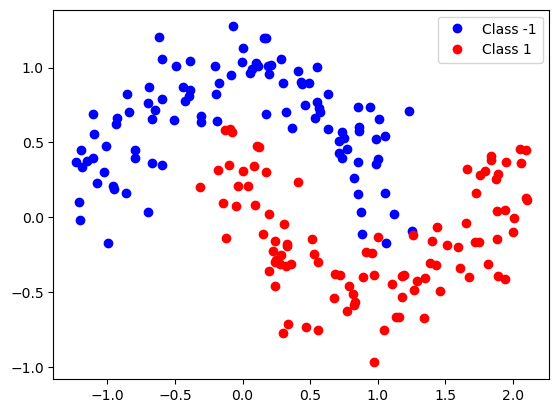

In [25]:
X = dataset[:, :-1]
Y = dataset[:, -1]

plt.plot(X[Y == -1, 0], X[Y == -1, 1], 'bo', label='Class -1')
plt.plot(X[Y == 1, 0], X[Y == 1, 1], 'ro', label='Class 1')
plt.legend()

In [26]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

# Standardize data
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import ex3_aux as aux

### Polynomial Kernel

In [28]:
train_errors = []
val_errors = []

best_c = 0
best_val_error = 1e6

# Cross validation with 5 folds
folds = 5
kf = StratifiedKFold(n_splits=folds)
Cs = []

# Explore different values for the regularization parameter C
C = 0.1
while C <= 1e4:
    Cs.append(C)
    train_error = 0
    val_error = 0
    for train_idx, valid_idx in kf.split(Y_train,Y_train):
        
        # Compute train and validation errors for the current fold
        svm = SVC(C=C, kernel='poly', degree=3, gamma=0.5, coef0=0.0)
        svm.fit(X_train[train_idx,:], Y_train[train_idx])
        tr_err = 1 - svm.score(X_train[train_idx,:], Y_train[train_idx])
        val_err = 1 - svm.score(X_train[valid_idx,:], Y_train[valid_idx])
        
        train_error += tr_err
        val_error += val_err
        
    train_errors.append(train_error / folds)
    val_errors.append(val_error / folds)
    
    # Save the model with the lowest validation error
    if val_error / folds < best_val_error:
        best_c = C
        best_val_error = val_error / folds
    
    
    C *= 2

Text(0, 0.5, 'Error')

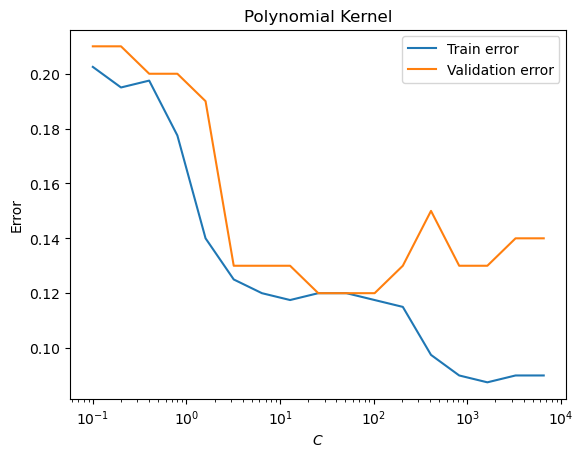

In [29]:
plt.plot(Cs, train_errors, label='Train error')
plt.plot(Cs, val_errors, label='Validation error')
plt.legend()
plt.xscale('log')
plt.title('Polynomial Kernel')
plt.xlabel('$C$')
plt.ylabel('Error')

Test error: 0.09999999999999998


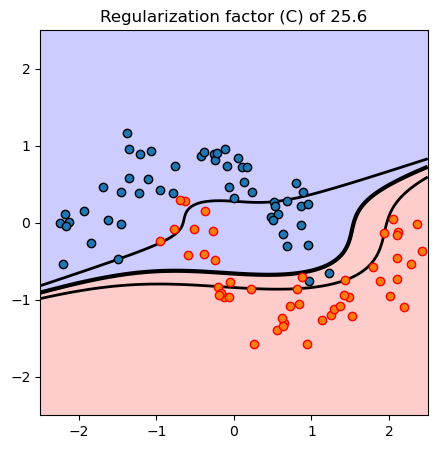

In [30]:
# Fit model with best parameters with the entire training set
svm = SVC(C=best_c, kernel='poly', degree=3, gamma=0.5, coef0=0.0)
svm.fit(X_train, Y_train)

# Compute test error
test_error = 1 - svm.score(X_test, Y_test)
print(f'Test error: {test_error}')

# Plot best model
train_data = np.concatenate((X_train, Y_train.reshape(-1,1)), axis=1)
aux.plot_svm(train_data, svm, best_c)

### Sigmoid Kernel

In [31]:
train_errors = []
val_errors = []

best_c = 0
best_val_error = 1e6

# Cross validation with 5 folds
folds = 5
kf = StratifiedKFold(n_splits=folds)
Cs = []

# Explore different values for the regularization parameter C
C = 0.1
while C <= 1e4:
    Cs.append(C)
    train_error = 0
    val_error = 0
    for train_idx, valid_idx in kf.split(Y_train,Y_train):
        
        # Compute train and validation errors for the current fold
        svm = SVC(C=C, kernel='sigmoid', gamma=0.5, coef0=-2.0)
        svm.fit(X_train[train_idx,:], Y_train[train_idx])
        tr_err = 1 - svm.score(X_train[train_idx,:], Y_train[train_idx])
        val_err = 1 - svm.score(X_train[valid_idx,:], Y_train[valid_idx])
        
        train_error += tr_err
        val_error += val_err
        
    train_errors.append(train_error / folds)
    val_errors.append(val_error / folds)
    
    # Save the model with the lowest validation error
    if val_error / folds < best_val_error:
        best_c = C
        best_val_error = val_error / folds
    
    
    C *= 2

Text(0, 0.5, 'Error')

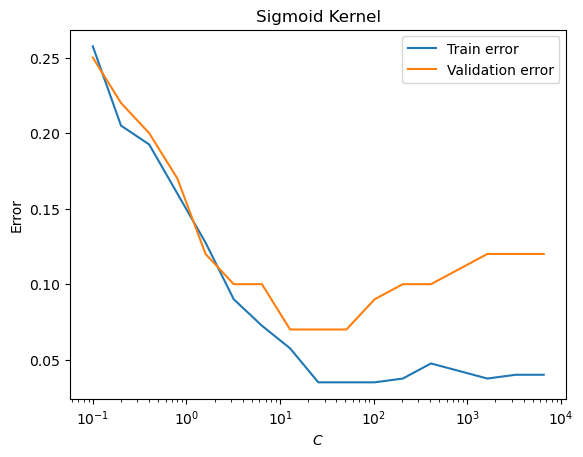

In [32]:
plt.plot(Cs, train_errors, label='Train error')
plt.plot(Cs, val_errors, label='Validation error')
plt.legend()
plt.xscale('log')
plt.title('Sigmoid Kernel')
plt.xlabel('$C$')
plt.ylabel('Error')

Test error: 0.030000000000000027


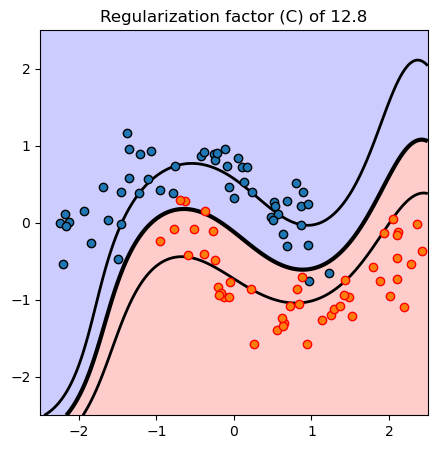

In [33]:
# Fit model with best parameters with the entire training set
svm = SVC(C=best_c, kernel='sigmoid', gamma=0.5, coef0=-2.0)
svm.fit(X_train, Y_train)

# Compute test error
test_error = 1 - svm.score(X_test, Y_test)
print(f'Test error: {test_error}')

# Plot best model
train_data = np.concatenate((X_train, Y_train.reshape(-1,1)), axis=1)
aux.plot_svm(train_data, svm, best_c)

### Gaussian RBF Kernel

In [34]:
C = 0.1

train_errors = []
val_errors = []

best_c = 0
best_val_error = 1e6

folds = 10
kf = StratifiedKFold(n_splits=folds)
Cs = []

while C <= 1e4:
    Cs.append(C)
    train_error = 0
    val_error = 0
    for train_idx, valid_idx in kf.split(Y_train,Y_train):
        svm = SVC(C=C, kernel='rbf', gamma=0.5)
        svm.fit(X_train[train_idx,:], Y_train[train_idx])
        tr_err = 1 - svm.score(X_train[train_idx,:], Y_train[train_idx])
        val_err = 1 - svm.score(X_train[valid_idx,:], Y_train[valid_idx])
        
        train_error += tr_err
        val_error += val_err
        
    train_errors.append(train_error / folds)
    val_errors.append(val_error / folds)
    
    if val_error / folds < best_val_error:
        best_c = C
        best_val_error = val_error / folds
    
    
    C *= 2

Text(0, 0.5, 'Error')

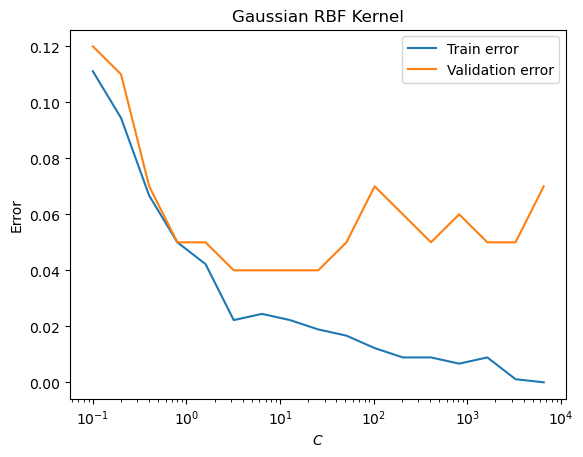

In [35]:
plt.plot(Cs, train_errors, label='Train error')
plt.plot(Cs, val_errors, label='Validation error')
plt.legend()
plt.xscale('log')
plt.title('Gaussian RBF Kernel')
plt.xlabel('$C$')
plt.ylabel('Error')

Test error: 0.010000000000000009


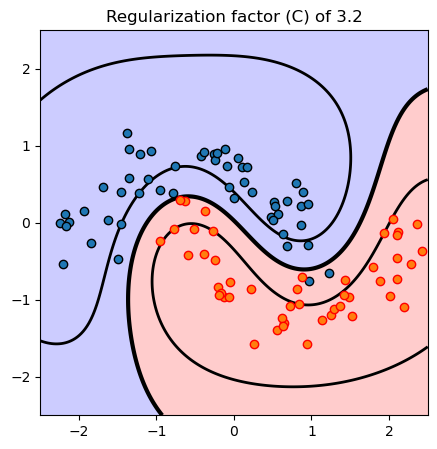

In [36]:
# Fit model with best parameters with the entire training set
svm = SVC(C=best_c, kernel='rbf', gamma=0.5)
svm.fit(X_train, Y_train)

# Compute test error
test_error = 1 - svm.score(X_test, Y_test)
print(f'Test error: {test_error}')

# Plot best model
train_data = np.concatenate((X_train, Y_train.reshape(-1,1)), axis=1)
aux.plot_svm(train_data, svm, best_c)

# Unsupervised Learning
## Exercise 4 - Vector Quantization with K-Means clustering

Use the images *dying_star.jpg* and *birth_of_stars.jpg* to this exercise. In this exercise we are going to compute $k$ centroids to the 3D colour space with the K-Means clustering algorithm, and then convert each pixel into the closest centroid to compress the colour space reducing the number of different colours in the image. This is called vector quantization because we are converting vectors in a continuous space into a finite set of values (quantities).

We start by loading the image using the *imread* function from the *skimage.io* module. We will also need the *imsave* function to save the images computed at the end. These functions simplify the conversion between image files and Numpy matrices. Note that the image is coded with one byte per colour, with an integer range of $0-255$. We will convert this into floating point values between $0-1$ by dividing the matrix by $255$.

Reshape all the points into a matrix of colours with 3 columns. This is the matrix we will use for the *K-Means* quantization. Now use the *KMeans* class from the *sklearn.cluster* module to compute 64 centroids and then convert all the colours to the nearest centroid. You can get the centroid positions from the *cluster_centers_* attribute of your *K-Means* object and the labels from the *predict* method. To convert the colours you just need to assign the nearest centroid values to the pixel colour values. Finally, reshape the colours matrix into an image matrix and save it.

In [37]:
def plot_3d_colour_space(data, colors, plot_title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], c=colors,s=10, alpha=0.7)
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(0,1)
    ax.set_title(plot_title)

In [38]:
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import axes3d
from skimage.io import imsave,imread

img = imread("birth_of_stars.jpg")
w,h,d = img.shape
cols = np.reshape(img/255.0, (w * h, d))

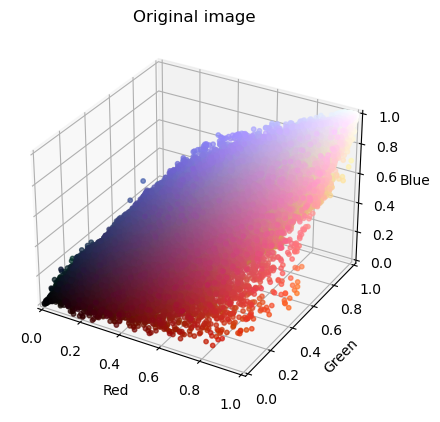

In [39]:
plot_3d_colour_space(cols, cols, plot_title='Original image')

### K-Means with 64 centroids

In [40]:
n_colors = 64
kmeans = KMeans(n_clusters=n_colors).fit(cols)
labels = kmeans.predict(cols)
centroids = kmeans.cluster_centers_

/Users/ric/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
# Substitute pixel color by the corresponding centroid color
c_cols = np.zeros(cols.shape)
for ix in range(cols.shape[0]):
    c_cols[ix,:]=centroids[labels[ix]]

img_comp64 = np.reshape(np.uint8(c_cols * 255.0),(w,h,3))

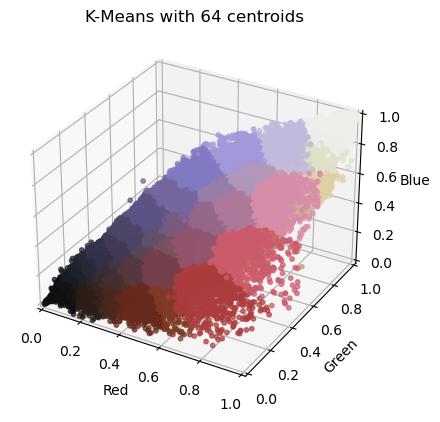

In [42]:
plot_3d_colour_space(cols, c_cols, plot_title='K-Means with 64 centroids')

### K-Means with 8 centroids

In [43]:
n_colors = 8
kmeans = KMeans(n_clusters=n_colors).fit(cols)
labels = kmeans.predict(cols)
centroids = kmeans.cluster_centers_

/Users/ric/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
# Substitute pixel color by the corresponding centroid color
c_cols = np.zeros(cols.shape)
for ix in range(cols.shape[0]):
    c_cols[ix,:]=centroids[labels[ix]]

img_comp8 = np.reshape(np.uint8(c_cols * 255.0),(w,h,3))

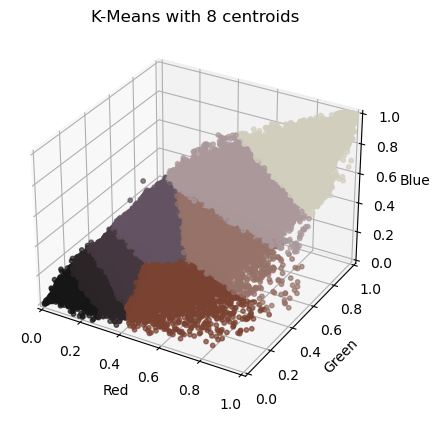

In [45]:
plot_3d_colour_space(cols, c_cols, plot_title='K-Means with 8 centroids')

Text(0.5, 1.0, '8 colors')

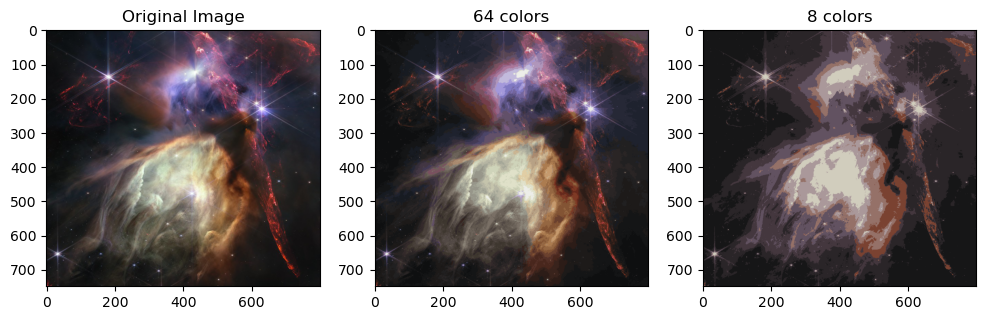

In [46]:
# Compare different images
fig, axs = plt.subplots(1, 3, figsize=(12,12))
axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[1].imshow(img_comp64)
axs[1].set_title('64 colors')
axs[2].imshow(img_comp8)
axs[2].set_title('8 colors')

# Additional exercise - Autoregressive (AR) Model for Orbit Prediction

In this exercise, we will use an autoregression model to forecast the orbit of a satellite. Load the dataset from the *orbital_data.npy* file. You can easily load this data using the *load()* function from the Numpy library. This dataset contains 2500 samples with the timestamp of the data ($t$), the position of the object ($x$ and $y$) and the velocity of the object ($v_x$ and $v_y$) throughout the trajectory.

In an autoregression model, we forecast our target values using a linear combination of its past values. The term autoregression indicates that it is a regression of the data against itself. An autoregressive model of order  
$p$ can be written as

\begin{align}
y_t = c + \beta_1 y_{t-1} + \beta_2 y_{t-2} + \ldots + \beta_p y_{t-p} + \epsilon_t
\end{align}

where $\epsilon_t$ denotes white noise. This is a regression problem but with lagged values of $y_t$. We refer to this as an **AR(p)** model, an autoregressive model of order p. *A more detailed explanation can be found in the book [Forecasting: Principles and Practice](https://otexts.com/fpp2/AR.html)*.

## Exercise 5.1 - AR(p)

In this exercise, we will just forecast the positions of the object throughout its trajectory. You can use the StatsModels library, which offers an implementation of an Autoregressive (AR) model. You should indicate the number $p$ of past values to consider at each timestep, the parameter *lags* (see documentation [here](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html#statsmodels.tsa.ar_model.AutoReg)). Try different values for p (or *lags*) and see what results it produces. This library only accepts 1D series, so you have to use one model for each axis of the position, $x$ and $y$. 

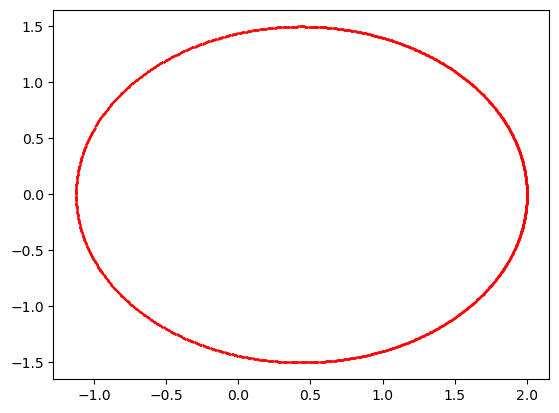

In [47]:
data = np.load('orbital_data.npy')
plt.plot(data[:,1], data[:,2], 'ro', markersize=0.6)

In [48]:
from statsmodels.tsa.ar_model import AutoReg

X = data[:,1:2]
Y = data[:,2:3]

n_lags = 5
arma_X = AutoReg(X, lags=n_lags).fit()
arma_Y = AutoReg(Y, lags=n_lags).fit()

In [49]:
X_pred = AutoReg(X, lags=n_lags).predict(arma_X.params,start=n_lags, end=X.shape[0]-1)
Y_pred = AutoReg(Y, lags=n_lags).predict(arma_Y.params,start=n_lags, end=Y.shape[0]-1)

X_error = AutoReg(X, lags=n_lags).score(arma_X.params)
Y_error = AutoReg(Y, lags=n_lags).score(arma_Y.params)

Text(0.5, 1.0, 'Mean absolute error:  9.63e-02')

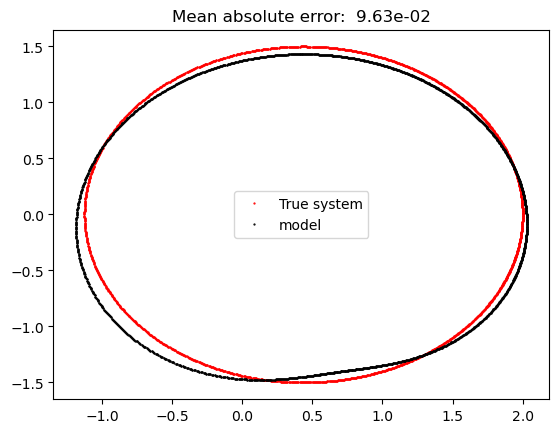

In [50]:
plt.plot(data[:,1], data[:,2], 'ro', markersize=0.6, label='True system')
plt.plot(X_pred, Y_pred, 'ko', markersize=0.6, label='model')
plt.legend()
MAE = np.mean(np.abs(X_pred - X[n_lags:].flatten())) + np.mean(np.abs(Y_pred - Y[n_lags:].flatten()))
plt.title(f'Mean absolute error: {MAE : .2e}')

## Exercise 5.2 - ARMA

We can also consider past forecast errors in a regression model as

\begin{align}
y_t = c + \alpha_1 \varepsilon_{t-1} + \alpha_2 \varepsilon_{t-2} + \ldots + \alpha_q \varepsilon_{t-q} + \epsilon_t
\end{align}

where $\epsilon_t$ denotes white noise and $\varepsilon_{k}$ denotes the forecast error at timestamp $k$. We refer to this as an **MA(q)** model, a moving average model of order q. Each value of $y_t$ can be thought of as a weighted moving average of the past $q$ forecast errors. *A more detailed explanation can be found in the book [Forecasting: Principles and Practice](https://otexts.com/fpp2/MA.html)*.

We can combine both in a Autoregressive Moving Average model, **ARMA(p,q)**. You can use the StatsModels library, which offers an implementation of an ARIMA model. To adapt this model to just an **ARMA(p,q)** model, you should define the *order* parameter as $order=(p, 0, q)$. (see documentation [here](https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html#statsmodels.tsa.arima.model.ARIMA)). Try different values for p and q. See what results it produces.

*You can also try values different than zero for the second value of the $order$ parameter, however you will be using the AutoRegressive Integrated Moving Average model, (__ARIMA(p,d,q)__). If you have interest, a more detailed explanation can be found in the book [Forecasting: Principles and Practice](https://otexts.com/fpp2/non-seasonal-arima.html).*

In [51]:
from statsmodels.tsa.arima.model import ARIMA

X = data[:,1:2]
Y = data[:,2:3]

n_lags = 5
ma_terms = 3
arma_X = ARIMA(X, order=(n_lags, 0, ma_terms)).fit()
arma_Y = ARIMA(Y, order=(n_lags, 0, ma_terms)).fit()

/Users/ric/miniforge3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ric/miniforge3/envs/tf/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ric/miniforge3/envs/tf/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
X_pred = arma_X.predict(start=n_lags, end=X.shape[0]-1)
Y_pred = arma_Y.predict(start=n_lags, end=Y.shape[0]-1)

X_error = ARIMA(X, order=(n_lags, 0, ma_terms)).score(arma_X.params)
Y_error = ARIMA(Y, order=(n_lags, 0, ma_terms)).score(arma_Y.params)

Text(0.5, 1.0, 'Mean absolute error:  6.53e-02')

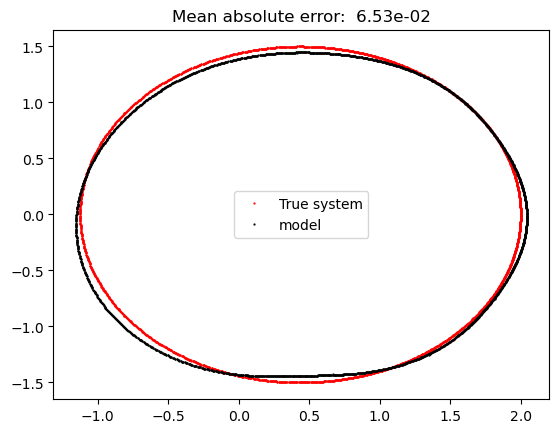

In [53]:
plt.plot(data[:,1], data[:,2], 'ro', markersize=0.6, label='True system')
plt.plot(X_pred, Y_pred, 'ko', markersize=0.6, label='model')
plt.legend()
MAE = np.mean(np.abs(X_pred - X[n_lags:].flatten())) + np.mean(np.abs(Y_pred - Y[n_lags:].flatten()))
plt.title(f'Mean absolute error: {MAE : .2e}')